# Build a classification model with Naive Bayes Algorithm for Hr dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,Employee_Name,EmpID,GenderID,EmpStatusID,DeptID,Salary,Termd,PositionID,Position,Sex,CitizenDesc,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences
0,"Adinolfi, Wilson K",10026,1,1,5,62506,0,19,Production Technician I,M,US Citizen,Active,Production,LinkedIn,Exceeds,4.60,5,0,1
1,"Ait Sidi, Karthikeyan",10084,1,5,3,104437,1,27,Sr. DBA,M,US Citizen,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,17
2,"Akinkuolie, Sarah",10196,0,5,5,64955,1,20,Production Technician II,F,US Citizen,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,3
3,"Alagbe,Trina",10088,0,1,5,64991,0,19,Production Technician I,F,US Citizen,Active,Production,Indeed,Fully Meets,4.84,5,0,15
4,"Anderson, Carol",10069,0,5,5,50825,1,19,Production Technician I,F,US Citizen,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,2


# Perform EDA

In [3]:
df.describe()

,EmpID,GenderID,EmpStatusID,DeptID,Salary,Termd,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.434084,2.392283,4.610932,69020.684887,0.334405,16.845659,4.110000,3.890675,1.218650,10.237942
std,89.922189,0.496435,1.794383,1.083487,25156.636930,0.472542,6.223419,0.789938,0.909241,2.349421,5.852596
min,10001.000000,0.000000,1.000000,1.000000,45046.000000,0.000000,1.000000,1.120000,1.000000,0.000000,1.000000
25%,10078.500000,0.000000,1.000000,5.000000,55501.500000,0.000000,18.000000,3.690000,3.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,5.000000,62810.000000,0.000000,19.000000,4.280000,4.000000,0.000000,10.000000
75%,10233.500000,1.000000,5.000000,5.000000,72036.000000,1.000000,20.000000,4.700000,5.000000,0.000000,15.000000
max,10311.000000,1.000000,5.000000,6.000000,250000.000000,1.000000,30.000000,5.000000,5.000000,8.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_Name         311 non-null    object 
 1   EmpID                 311 non-null    int64  
 2   GenderID              311 non-null    int64  
 3   EmpStatusID           311 non-null    int64  
 4   DeptID                311 non-null    int64  
 5   Salary                311 non-null    int64  
 6   Termd                 311 non-null    int64  
 7   PositionID            311 non-null    int64  
 8   Position              311 non-null    object 
 9   Sex                   311 non-null    object 
 10  CitizenDesc           311 non-null    object 
 11  EmploymentStatus      311 non-null    object 
 12  Department            311 non-null    object 
 13  RecruitmentSource     311 non-null    object 
 14  PerformanceScore      311 non-null    object 
 15  EngagementSurvey      3

In [5]:
# Checking for missing values
df.isna().sum()

Employee_Name           0
EmpID                   0
GenderID                0
EmpStatusID             0
DeptID                  0
Salary                  0
Termd                   0
PositionID              0
Position                0
Sex                     0
CitizenDesc             0
EmploymentStatus        0
Department              0
RecruitmentSource       0
PerformanceScore        0
EngagementSurvey        0
EmpSatisfaction         0
SpecialProjectsCount    0
Absences                0
dtype: int64

In [6]:
# Implement a decision tree classifier using Python libraries

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Position'] = le.fit_transform(df['Position'])
df['Sex'] = le.fit_transform(df['Sex'])
df['CitizenDesc'] = le.fit_transform(df['CitizenDesc'])
df['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])
df['Department'] = le.fit_transform(df['Department'])
df['RecruitmentSource'] = le.fit_transform(df['RecruitmentSource'])
df['PerformanceScore'] = le.fit_transform(df['PerformanceScore'])
df.head()

,Employee_Name,EmpID,GenderID,EmpStatusID,DeptID,Salary,Termd,PositionID,Position,Sex,CitizenDesc,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences
0,"Adinolfi, Wilson K",10026,1,1,5,62506,0,19,22,1,2,0,3,5,0,4.60,5,0,1
1,"Ait Sidi, Karthikeyan",10084,1,5,3,104437,1,27,30,1,2,2,2,4,1,4.96,3,6,17
2,"Akinkuolie, Sarah",10196,0,5,5,64955,1,20,23,0,2,2,3,5,1,3.02,3,0,3
3,"Alagbe,Trina",10088,0,1,5,64991,0,19,22,0,2,0,3,4,1,4.84,5,0,15
4,"Anderson, Carol",10069,0,5,5,50825,1,19,22,0,2,2,3,3,1,5.00,4,0,2


In [7]:
df.dtypes

Employee_Name            object
EmpID                     int64
GenderID                  int64
EmpStatusID               int64
DeptID                    int64
Salary                    int64
Termd                     int64
PositionID                int64
Position                  int32
Sex                       int32
CitizenDesc               int32
EmploymentStatus          int32
Department                int32
RecruitmentSource         int32
PerformanceScore          int32
EngagementSurvey        float64
EmpSatisfaction           int64
SpecialProjectsCount      int64
Absences                  int64
dtype: object

In [8]:
df.shape

(311, 19)

In [9]:
df['Salary'].unique()

array([ 62506, 104437,  64955,  64991,  50825,  57568,  95660,  59365,
        47837,  50178,  54670,  47211,  92328,  58709,  52505,  57834,
        70131,  59026, 110000,  53250,  51044,  64919,  62910,  66441,
        57815, 103613, 106367,  74312,  53492,  63000,  65288,  64375,
        74326,  63763,  62162,  77692,  72640,  93396,  52846, 100031,
        71860,  61656, 110929,  54237,  60380,  66808,  64786,  64816,
        68678,  64066,  59369,  50373,  63108,  59144,  68051, 170500,
        63381,  83552,  56149,  92329,  65729,  85028,  57583,  56294,
        56991,  55722, 101199,  61568,  58275,  53189,  96820,  51259,
        59231,  61584,  46335,  70621, 138888,  74241,  75188,  62514,
        60070,  48888,  54285,  56847,  60340,  59124,  99280,  71776,
        65902,  57748,  64057,  53366,  58530,  72609,  55965,  70187,
       178000,  99351,  67251,  65707,  52249,  53171,  51337,  51505,
        59370,  54933,  61555, 114800,  74679,  53018,  59892,  68898,
      

<AxesSubplot: xlabel='Salary', ylabel='count'>

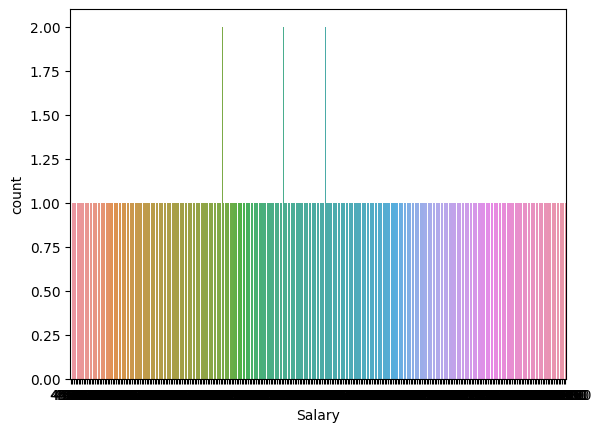

In [10]:
sns.countplot(x='Salary', data = df)

array([[<AxesSubplot: title={'center': 'EmpID'}>,
        <AxesSubplot: title={'center': 'GenderID'}>,
        <AxesSubplot: title={'center': 'EmpStatusID'}>,
        <AxesSubplot: title={'center': 'DeptID'}>],
       [<AxesSubplot: title={'center': 'Salary'}>,
        <AxesSubplot: title={'center': 'Termd'}>,
        <AxesSubplot: title={'center': 'PositionID'}>,
        <AxesSubplot: title={'center': 'Position'}>],
       [<AxesSubplot: title={'center': 'Sex'}>,
        <AxesSubplot: title={'center': 'CitizenDesc'}>,
        <AxesSubplot: title={'center': 'EmploymentStatus'}>,
        <AxesSubplot: title={'center': 'Department'}>],
       [<AxesSubplot: title={'center': 'RecruitmentSource'}>,
        <AxesSubplot: title={'center': 'PerformanceScore'}>,
        <AxesSubplot: title={'center': 'EngagementSurvey'}>,
        <AxesSubplot: title={'center': 'EmpSatisfaction'}>],
       [<AxesSubplot: title={'center': 'SpecialProjectsCount'}>,
        <AxesSubplot: title={'center': 'Absences

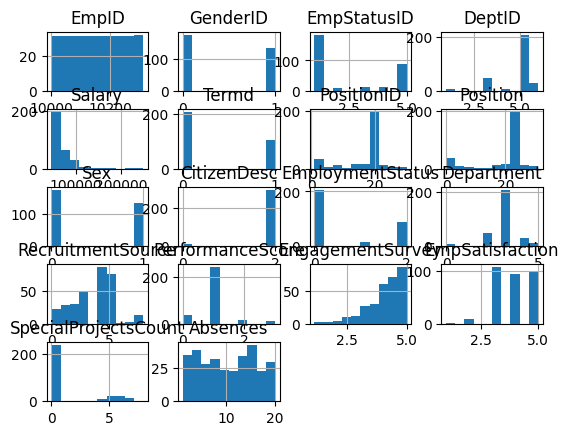

In [11]:
df.hist()

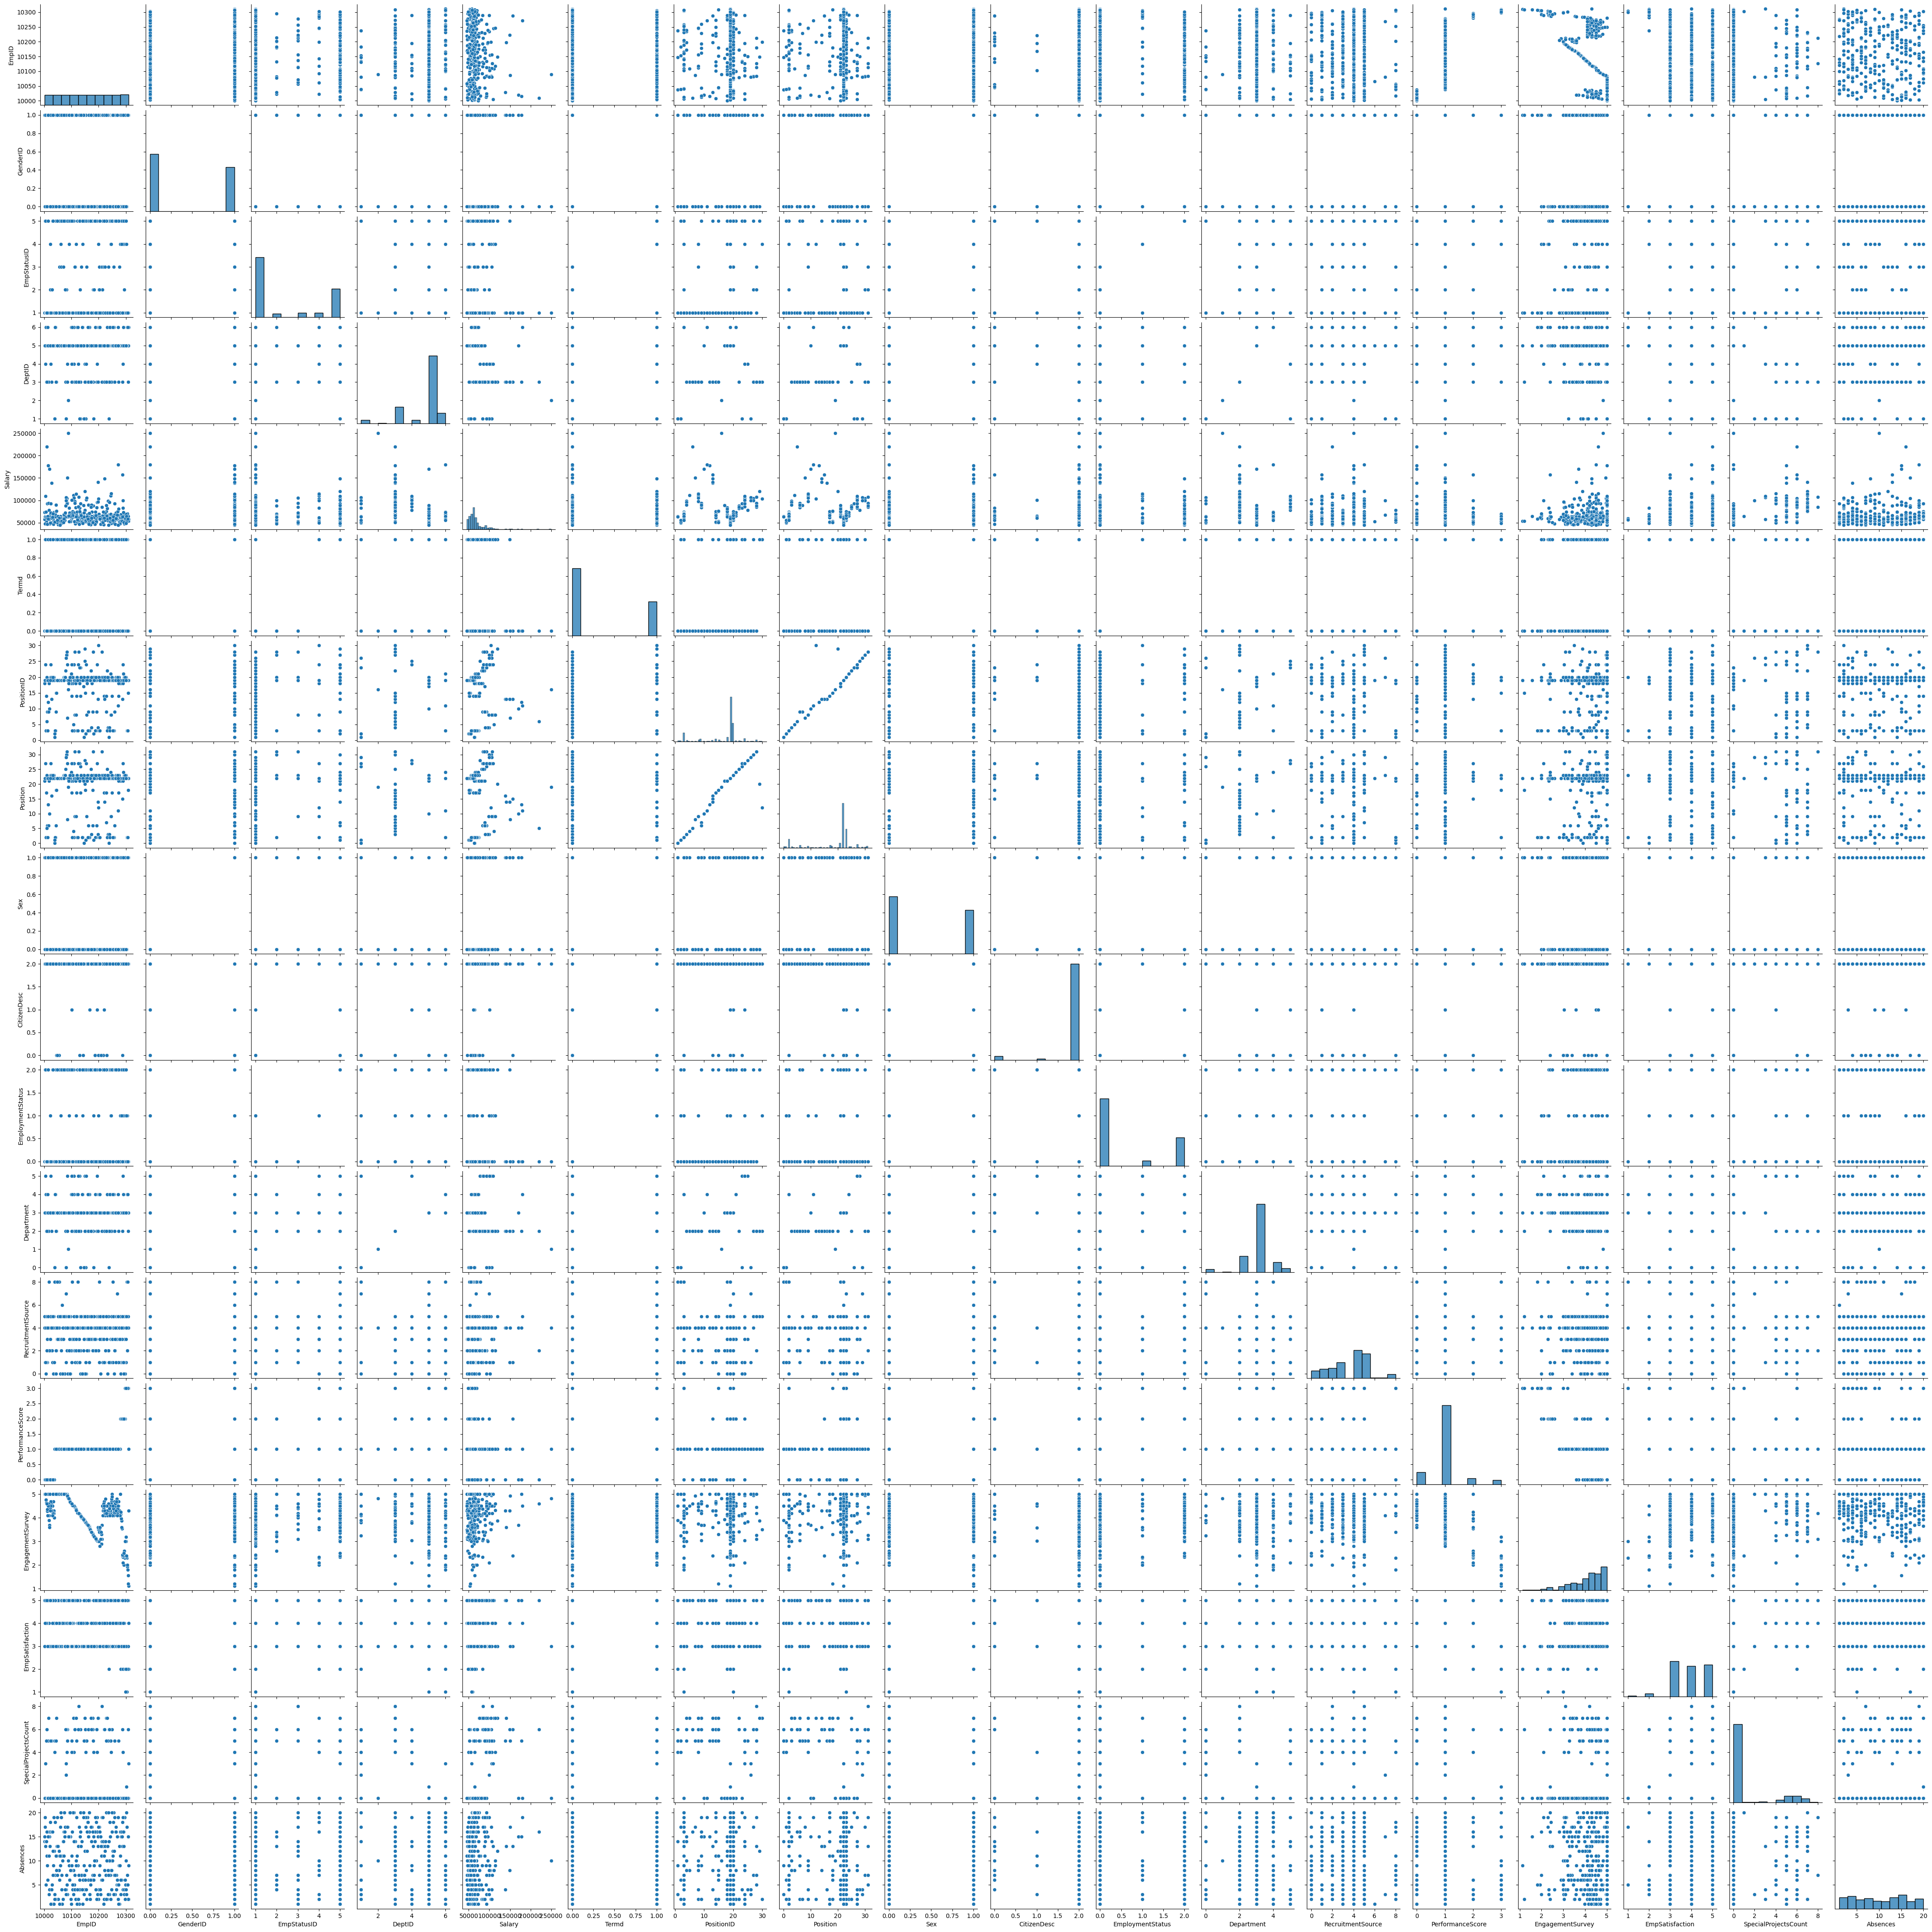

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_44960\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,EmpID,GenderID,EmpStatusID,DeptID,Salary,Termd,PositionID,Position,Sex,CitizenDesc,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Absences
EmpID,1.000000,0.035914,0.073750,0.107406,-0.115319,0.092389,-0.036488,-0.035142,0.035914,-0.017959,0.062864,0.058797,-0.012663,0.690614,-0.589664,-0.146967,-0.043730,-0.025278
GenderID,0.035914,1.000000,-0.032440,-0.038838,0.056097,-0.015741,-0.081612,-0.093812,1.000000,-0.013754,-0.016979,0.002271,0.020833,0.054915,-0.036276,-0.044603,0.087073,-0.004577
EmpStatusID,0.073750,-0.032440,1.000000,0.088711,-0.110912,0.948058,0.221221,0.208471,-0.032440,-0.058570,0.959279,0.057523,-0.187808,0.071208,0.024305,0.010553,-0.166560,0.091834
DeptID,0.107406,-0.038838,0.088711,1.000000,-0.448132,0.065922,0.030294,0.074248,-0.038838,0.015695,0.085298,0.752268,0.078471,0.084811,-0.094940,0.031997,-0.785101,0.053308
Salary,-0.115319,0.056097,-0.110912,-0.448132,1.000000,-0.093994,-0.130563,-0.184032,0.056097,-0.033163,-0.113307,-0.198331,-0.039632,-0.125138,0.064966,0.062718,0.508333,0.082382
Termd,0.092389,-0.015741,0.948058,0.065922,-0.093994,1.000000,0.147042,0.130821,-0.015741,-0.062140,0.972487,0.047477,-0.200198,0.112317,-0.017543,-0.004732,-0.147429,0.098274
PositionID,-0.036488,-0.081612,0.221221,0.030294,-0.130563,0.147042,1.000000,0.974800,-0.081612,0.004772,0.173709,0.076591,-0.099945,-0.033480,0.074974,-0.010402,-0.154326,-0.071434
Position,-0.035142,-0.093812,0.208471,0.074248,-0.184032,0.130821,0.974800,1.000000,-0.093812,-0.003867,0.165361,0.096064,-0.109108,-0.026090,0.086154,-0.022200,-0.226137,-0.064027
Sex,0.035914,1.000000,-0.032440,-0.038838,0.056097,-0.015741,-0.081612,-0.093812,1.000000,-0.013754,-0.016979,0.002271,0.020833,0.054915,-0.036276,-0.044603,0.087073,-0.004577
CitizenDesc,-0.017959,-0.013754,-0.058570,0.015695,-0.033163,-0.062140,0.004772,-0.003867,-0.013754,1.000000,-0.078432,-0.082252,0.036005,-0.018839,0.054685,-0.062705,0.014167,-0.036336


C:\Users\Ramesh\AppData\Local\Temp\ipykernel_44960\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

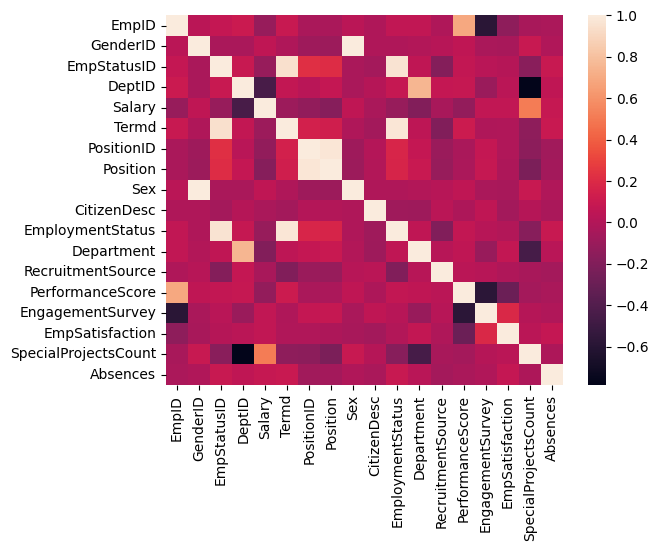

In [14]:
sns.heatmap(df.corr())

<AxesSubplot: >

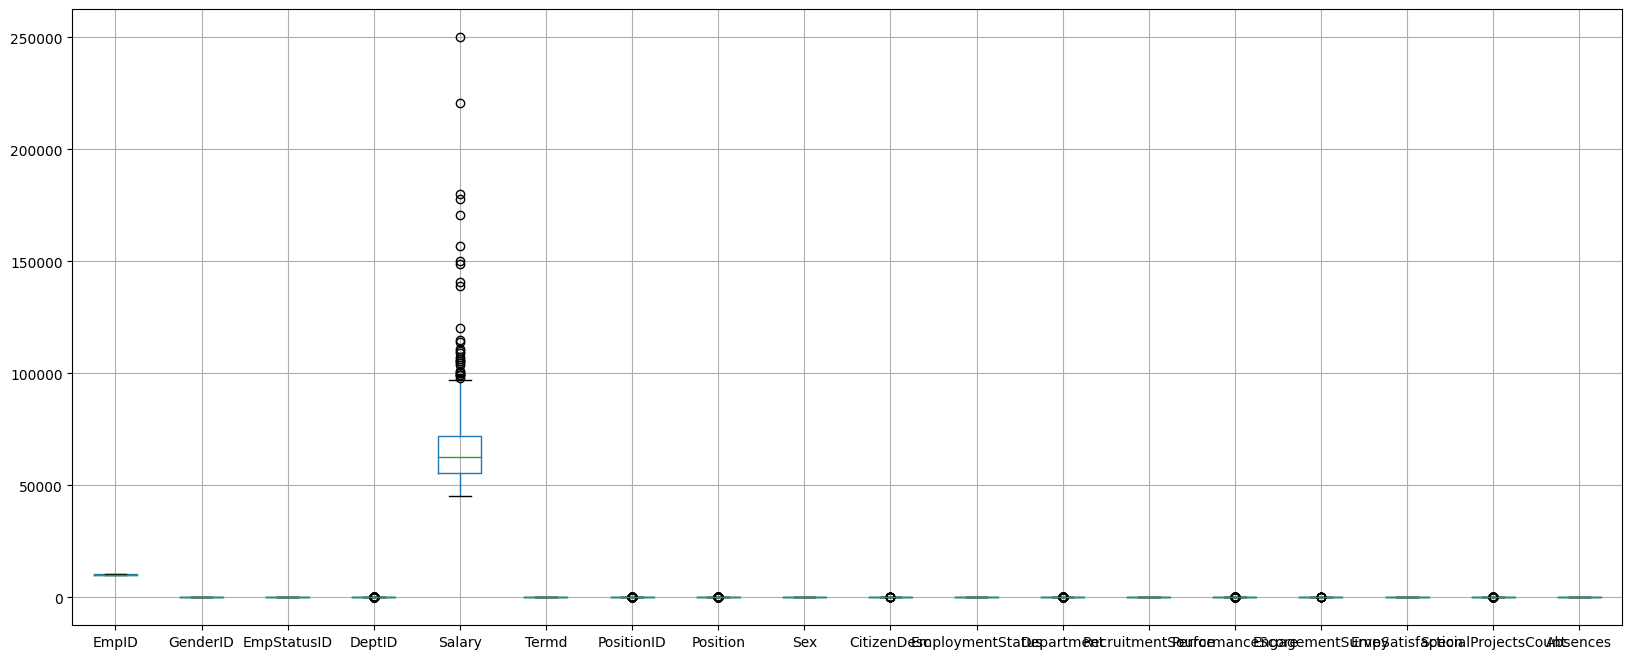

In [15]:
df.boxplot(figsize=(20,8))

In [16]:
df = df.drop(['Employee_Name', 'GenderID', 'Termd', 'CitizenDesc', 'SpecialProjectsCount','DeptID' ], axis = 1)
df.head(1)

,EmpID,EmpStatusID,Salary,PositionID,Position,Sex,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences
0,10026,1,62506,19,22,1,0,3,5,0,4.6,5,1


In [17]:
# Assign X & Y

x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [18]:
# Splitting

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# Build the Naive Bayes model

# 1. Gaussian

In [19]:
from sklearn.naive_bayes import GaussianNB

Gmodel = GaussianNB()
print('***********************Naive Bayes Gaussian**********************\n')
print('Training started..........\n')
Gmodel.fit(X_train, Y_train)
print('Training completed......!\n')
print()
print('Testing started.........\n')
y_pred = Gmodel.predict(X_test)
print('Predicted class labels are: \n', y_pred)
print('\nTesting completed.......!')

***********************Naive Bayes Gaussian**********************

Training started..........

Training completed......!


Testing started.........

Predicted class labels are: 
 [10  4  4  1 10 13  8  4  1 12 18  8  1  1  4  1  4 18 18  1  4  4 18 11
  4  1  1  4  1  4 12  4  4 14  1  1  6  1  7  1 18  4 18  8  4  1  4  1
  4  4 13  4 10  4 20 18  4  1  4  1  1  6 18]

Testing completed.......!


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
G_accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy: {G_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.0159

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.05      0.20      0.08         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# 2. Multinomial

In [21]:
from sklearn.naive_bayes import MultinomialNB

Mmodel = MultinomialNB()
print('*************************Naive Bayes Multinomial****************************\n')
print('Training started.........\n')
Mmodel.fit(X_train, Y_train)
print('Training completed........!\n')
print()
print('Testing started.........\n')
y_pred = Mmodel.predict(X_test)
print('Predicted class labels are: \n', y_pred)
print('\nTesting completed........!')

*************************Naive Bayes Multinomial****************************

Training started.........

Training completed........!


Testing started.........

Predicted class labels are: 
 [10  4  6  1 10 10 10  4 16  6 18 10  6 16 12  6  1 18 18 15  1  6  2  6
  6 13  1  1  1  8  5 12  8 18  4 11  6  1 10  2 14  6  9 10  6  6 11 11
  6  1 10  6 10  6 15 18 11 13  6  5  6  5  6]

Testing completed........!


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
M_accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy: {M_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.0635

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.50      0.20      0.29         5
           3       0.00      0.00      0.00         4
           4       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         4
           6       0.12      0.50      0.19         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# 3. Bernoulli

In [23]:
from sklearn.naive_bayes import BernoulliNB

Bmodel = BernoulliNB()
print('***************************Naive Bayes Bernoulli**************************\n')
print('Training started...........\n')
Bmodel.fit(X_train, Y_train)
print('Training completed........!\n')
print()
print('Testing started.........\n')
y_pred = Bmodel.predict(X_test)
print('Predicted class labels are: \n', y_pred)
print('\nTesting completed.........!')

***************************Naive Bayes Bernoulli**************************

Training started...........

Training completed........!


Testing started.........

Predicted class labels are: 
 [ 7 13 16 16  7 16  3 16  7 16  7  7 16 16 16 16 13 20  7 16 13 16  7 16
  7 13 13 13 13 16 13 20 13  3  7 16  3  7 16  7 13 16 16  7 20  7 16 13
 13  7 13 16 16 16 20 13  7 13 16 16 13  7 13]

Testing completed.........!


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
B_accuracy = accuracy_score(Y_test, y_pred)

print(f"Accuracy: {B_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       3.0
           2       0.00      0.00      0.00       5.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       5.0
           5       0.00      0.00      0.00       4.0
           6       0.00      0.00      0.00       4.0
           7       0.00      0.00      0.00       5.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       4.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       5.0
          12       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       5.0
          15       0.00      0.00      0.00       4.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [25]:
print('GModel =', G_accuracy)
print('MModel =', M_accuracy)
print('BModel =', B_accuracy)

GModel = 0.015873015873015872
MModel = 0.06349206349206349
BModel = 0.0


# Ensemble Model

# 1. Bagging Classifier

In [26]:
from sklearn.ensemble import BaggingClassifier

bagC = BaggingClassifier(base_estimator = Gmodel, n_estimators = 5, random_state = 10)
print('*************************Bagging Classifier****************************\n')
print('Training started.........\n')
bagC.fit(X_train, Y_train)
print('Training completed........!\n')
print()
print('Testing started.........\n')
y_pred_bagC = bagC.predict(X_test)
print('Predicted class labels are: \n', y_pred_bagC)
print('\nTesting completed........!')

bagC_accuracy = accuracy_score(Y_test, y_pred_bagC)
print(f"Accuracy: {bagC_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_bagC))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_bagC))

*************************Bagging Classifier****************************

Training started.........

Training completed........!


Testing started.........

Predicted class labels are: 
 [16  4  5 11  8  7  8 11  4 11  7  8 11  1  4 10  4  6 18  1  4  4 18  8
  4  1  1  4  1  4  4 17  4  8  1  1  6  1  7  4 17  5 20  8  2  4 11  6
  4  4  7  4 16 14 20 17  4  1 11 11  6  8 17]

Testing completed........!
Accuracy: 0.0317

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.06      0.20      0.09         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          1

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined 

# 2. RandomForestClassifier model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators = 10, random_state = 1)
print('*************************RandomForestClassifier****************************\n')
print('Training started.........\n')
rand.fit(X_train, Y_train)
print('Training completed........!\n')
print()
print('Testing started.........\n')
y_pred_rand = rand.predict(X_test)
print('Predicted class labels are: \n', y_pred_rand)
print('\nTesting completed........!')

rand_accuracy = accuracy_score(Y_test, y_pred_rand)
print(f"Accuracy: {rand_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_rand))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_rand))

*************************RandomForestClassifier****************************

Training started.........

Training completed........!


Testing started.........

Predicted class labels are: 
 [10  9  5 16 10 12  3  7  2  2 15 15 11  1 10  1  3  4 19 16  4  3 18  5
 13  4  7  2  1 14  5 17 19  3  4 19  6 15 13  4  3 16  7  8 19  6 16  6
 15 13  7 19 19  5 13 16  6 19 16  2  1  2  5]

Testing completed........!
Accuracy: 0.0476

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         5
           5       0.20      0.25      0.22         4
           6       0.00      0.00      0.00         4
           7       0.25      0.20      0.22         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
       

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Pyt

In [28]:
from sklearn.ensemble import RandomForestClassifier

rand1 = RandomForestClassifier(n_estimators = 10, random_state = 1, max_depth = 5)
print('*************************RandomForestClassifier****************************\n')
print('Training started.........\n')
rand1.fit(X_train, Y_train)
print('Training completed........!\n')
print()
print('Testing started.........\n')
y_pred_rand1 = rand1.predict(X_test)
print('Predicted class labels are: \n', y_pred_rand1)
print('\nTesting completed........!')

rand1_accuracy = accuracy_score(Y_test, y_pred_rand1)
print(f"Accuracy: {rand1_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_rand1))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_rand1))

*************************RandomForestClassifier****************************

Training started.........

Training completed........!


Testing started.........

Predicted class labels are: 
 [10  4  4 16 17  7  4 13 16  9  4  8  2  1 16  1  8 16  2 11 13  4  7 16
  6 20  2  2  1 20  5 20  2 20 15 19 20  7  7  4  3  4  7 16  6  2 16  6
 13 16  7  2 19  6 17 16  6 15  4  2  2 16 17]

Testing completed........!
Accuracy: 0.0952

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.22      0.40      0.29         5
           3       0.00      0.00      0.00         4
           4       0.25      0.40      0.31         5
           5       0.00      0.00      0.00         4
           6       0.20      0.25      0.22         4
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
       

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ramesh\AppData\Roaming\Python\Pyt

# 3. ExtraTrees model

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier(n_estimators = 10, bootstrap = True, verbose = 2)
print('*************************ExtraTreesClassifier****************************\n')
print('Training started.........\n')
extra_tree.fit(X_train, Y_train)
print('Training completed........!\n')
print()
print('Testing started.........\n')
y_pred_extra_tree = extra_tree.predict(X_test)
print('Predicted class labels are: \n', y_pred_extra_tree)
print('\nTesting completed........!')

extra_tree_accuracy = accuracy_score(Y_test, y_pred_extra_tree)
print(f"Accuracy: {extra_tree_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_extra_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_extra_tree))

*************************ExtraTreesClassifier****************************

Training started.........

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
Training completed........!


Testing started.........

Predicted class labels are: 
 [ 2 17  4 11 10  7  3 15  3  9 11 15 11 16  1  1  7  6 18  1  9 18  7 16
  7  4 13 14  1  9  9 17 19  4 15 19 16 15 13  4 13 20 20  2 19 19 16  6
 13  6 13 16 19  6  2  6 20 13 16 17  1 16  5]

Testing completed........!
Accuracy: 0.0794

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         5
           5       1.00      0.25      0.40         4
    

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

# Model with Accuracy scores

In [30]:
scores = [('Gaussian_NB', G_accuracy),
          ('Multinomial_NB', M_accuracy),
          ('Bernoulli_NB', B_accuracy),
          ('Bagging_Classifier', bagC_accuracy),
          ('RandomForest_Classifier', rand_accuracy),
          ('RandomForest_Classifier with pruning', rand1_accuracy),
         ('ExtraTrees_Classifier', extra_tree_accuracy)]
acc_scores = pd.DataFrame(scores, columns = ['Model', 'Accuracy_score'])
print(acc_scores.sort_values(by='Accuracy_score', ascending = False))

                                  Model  Accuracy_score
5  RandomForest_Classifier with pruning        0.095238
6                 ExtraTrees_Classifier        0.079365
1                        Multinomial_NB        0.063492
4               RandomForest_Classifier        0.047619
3                    Bagging_Classifier        0.031746
0                           Gaussian_NB        0.015873
2                          Bernoulli_NB        0.000000


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Gaussian_NB'),
  Text(1, 0, 'Multinomial_NB'),
  Text(2, 0, 'Bernoulli_NB'),
  Text(3, 0, 'Bagging_Classifier'),
  Text(4, 0, 'RandomForest_Classifier'),
  Text(5, 0, 'RandomForest_Classifier with pruning'),
  Text(6, 0, 'ExtraTrees_Classifier')])

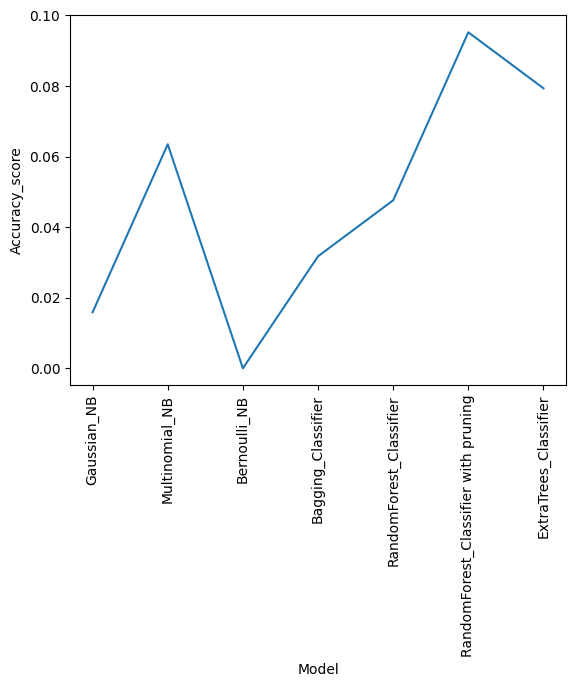

In [31]:
sns.lineplot(x=acc_scores['Model'], y=acc_scores['Accuracy_score'], data=acc_scores)
plt.xticks(rotation=90)

# Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lin_reg = LinearRegression()
print('*************************LinearRegression****************************\n')
print('Training started.........\n')
lin_reg.fit(X_train, Y_train)
print('Hyperparameter:\n', lin_reg.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_lin_reg = lin_reg.predict(X_test)
print('Predicted class labels are: \n', y_pred_lin_reg)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_lin_reg))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_lin_reg)))
print('R-Square value:\t',r2_score(Y_test,y_pred_lin_reg))

*************************LinearRegression****************************

Training started.........

Hyperparameter:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [[11.79712516]
 [10.79950008]
 [ 9.11455158]
 [11.3195302 ]
 [11.0168361 ]
 [ 9.57684824]
 [ 8.91754195]
 [ 9.4906926 ]
 [ 9.40393325]
 [11.68764531]
 [11.76976923]
 [11.39377489]
 [10.72392071]
 [10.20754938]
 [11.40760827]
 [10.71319582]
 [10.18030774]
 [14.57448806]
 [11.84123555]
 [11.51618042]
 [10.22498812]
 [10.77230965]
 [12.90449626]
 [10.68488438]
 [ 9.61426911]
 [10.01372169]
 [10.34376612]
 [ 9.33572957]
 [ 9.52734517]
 [11.75326617]
 [10.7910725 ]
 [11.31249501]
 [ 9.55617925]
 [11.07089441]
 [10.1851554 ]
 [10.22306917]
 [12.28321741]
 [10.2095459 ]
 [14.31733867]
 [10.28774931]
 [12.38942472]
 [ 9.51060299]
 [13.69081139]
 [11.66544272]
 [11.11105352]
 [ 9.1695102 ]
 [11.40425385]
 [ 8.6932192 ]
 [ 

# KNN Regression

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
knn_reg = KNeighborsRegressor(n_neighbors=3)
print('*************************KNNRegression****************************\n')
print('Training started.........\n')
knn_reg.fit(X_train, Y_train)
print('Hyperparameter:\n', knn_reg.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_knn_reg = knn_reg.predict(X_test)
print('Predicted class labels are: \n', y_pred_knn_reg)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_knn_reg))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_knn_reg)))
print('R-Square value:\t',r2_score(Y_test,y_pred_knn_reg))

*************************KNNRegression****************************

Training started.........

Hyperparameter:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Training completed........!


Testing started.........

Predicted class labels are: 
 [[14.33333333]
 [13.        ]
 [10.        ]
 [12.33333333]
 [10.        ]
 [ 7.66666667]
 [ 7.66666667]
 [17.33333333]
 [12.        ]
 [10.66666667]
 [12.66666667]
 [14.        ]
 [11.33333333]
 [13.66666667]
 [10.        ]
 [15.        ]
 [10.33333333]
 [13.        ]
 [ 8.66666667]
 [14.66666667]
 [ 5.33333333]
 [11.        ]
 [10.66666667]
 [ 3.33333333]
 [ 9.        ]
 [15.66666667]
 [13.66666667]
 [16.33333333]
 [10.        ]
 [ 3.33333333]
 [12.        ]
 [12.33333333]
 [ 3.33333333]
 [ 8.66666667]
 [18.66666667]
 [16.        ]
 [12.        ]
 [ 7.        ]
 [ 8.        ]
 [ 5.        ]
 [17.33333333]
 [13.33333333]
 [14.66666667]
 [12.  

# Decision Tree Regression Model

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
dt_reg = DecisionTreeRegressor()
print('*************************Decision Tree Regression****************************\n')
print('Training started.........\n')
dt_reg.fit(X_train, Y_train)
print('Hyperparameter:\n', dt_reg.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_dt_reg = dt_reg.predict(X_test)
print('Predicted class labels are: \n', y_pred_dt_reg)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_dt_reg))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_dt_reg)))
print('R-Square value:\t',r2_score(Y_test,y_pred_dt_reg))

*************************Decision Tree Regression****************************

Training started.........

Hyperparameter:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Training completed........!


Testing started.........

Predicted class labels are: 
 [10.  9.  2.  3.  8. 17.  3. 12. 20. 15.  6.  8.  1. 13. 20. 12. 18. 18.
  6. 16.  4. 14.  7. 16.  2. 19. 13. 14.  1. 20. 19. 16.  2.  6. 16. 20.
  8.  4.  3. 16. 13.  2.  8.  8.  4. 14. 12.  6. 14.  4.  7. 13.  9.  1.
 13.  6. 19. 19. 13. 19.  4.  3. 17.]

Testing completed........!

Performance measures:
Mean Squared Error:	 66.39682539682539
RMSE:	 8.14842471873094
R-Square value:	 -1.119661213261908


# Support Vector Regressor

In [35]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
svr = SVR()
print('*************************Support Vector Regression****************************\n')
print('Training started.........\n')
svr.fit(X_train, Y_train)
print('Hyperparameter:\n', svr.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_svr = svr.predict(X_test)
print('Predicted class labels are: \n', y_pred_svr)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_svr))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_svr)))
print('R-Square value:\t',r2_score(Y_test,y_pred_svr))

*************************Support Vector Regression****************************

Training started.........

Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [13.73312522 10.8868934  10.9040551  10.89803137 12.57088901 10.90806856
 10.93399245 10.88502925 10.87008681 10.89820662 10.89784532 10.84903711
 10.90422161 10.87461053 10.87945534 10.90299527 10.89529815 10.90153412
 10.89550603 10.85979767 10.89722391 10.8967808  10.89417258 10.90334868
 10.90423559 10.86071667 10.89464679 10.89345662 10.89987495 10.83328806
 10.90095307 10.88238544 10.83105831 10.89558882 10.88639215 10.90315773
 10.90428812 10.89482421 10.89816904 10.89145851 10.88481686 10.90369886
 10.87042286 10.82417622 10.90184089 10.90335079 10.90283071 10.90269814
 10.89739617 10.89545544 10.82

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Boosting

# Adaboost Regressor

In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
ada = AdaBoostRegressor(base_estimator=lin_reg, n_estimators=15)
print('*************************Adaboost Regressor****************************\n')
print('Training started.........\n')
ada.fit(X_train, Y_train)
print('Hyperparameter:\n', ada.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_ada = ada.predict(X_test)
print('Predicted class labels are: \n', y_pred_ada)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_ada))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_ada)))
print('R-Square value:\t',r2_score(Y_test,y_pred_ada))

*************************Adaboost Regressor****************************

Training started.........

Hyperparameter:
 {'base_estimator__copy_X': True, 'base_estimator__fit_intercept': True, 'base_estimator__n_jobs': None, 'base_estimator__positive': False, 'base_estimator': LinearRegression(), 'estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 15, 'random_state': None}

Training completed........!


Testing started.........

Predicted class labels are: 
 [11.85624561 10.91040409  8.52688885 11.19781758 11.27741793  9.5822532
  9.82850515  9.56862365  9.53819132 10.92454633 11.51694036 11.50244582
 10.58746837  9.85082549 11.1838774  11.25636303 11.06396833 13.73027148
 11.63145929 11.24216356 10.381589   11.16668903 12.27555939 11.05592421
 10.31177656 10.70016708  7.50759248  9.51869309  9.81771373 10.96696732
 10.64222099 10.97640628  9.53749723 11.64928193 10.4017552  10.53692564
 12.70210082 10.48104464 11.91144339 10.83157232 12.3012188  10.67314307
 12.5242

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# Gradient Boosting Regression

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
grad_boost = GradientBoostingRegressor(n_estimators=15)
print('*************************Gradient Boosting Regressor****************************\n')
print('Training started.........\n')
grad_boost.fit(X_train, Y_train)
print('Hyperparameter:\n', grad_boost.get_params())
print('\nTraining completed........!\n')
print()
print('Testing started.........\n')
y_pred_grad_boost = grad_boost.predict(X_test)
print('Predicted class labels are: \n', y_pred_grad_boost)
print('\nTesting completed........!\n')
print('Performance measures:')
print('Mean Squared Error:\t',mean_squared_error(Y_test,y_pred_grad_boost))
print('RMSE:\t',np.sqrt(mean_squared_error(Y_test,y_pred_grad_boost)))
print('R-Square value:\t',r2_score(Y_test,y_pred_grad_boost))

*************************Gradient Boosting Regressor****************************

Training started.........

Hyperparameter:
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Training completed........!


Testing started.........

Predicted class labels are: 
 [ 8.65915785 11.30262154  8.68191179  9.77019117 11.29904095 10.9262373
  9.4833222   9.61116805  9.78354819 12.89793259 10.82937953 10.42202712
  9.15874849 12.09840388 10.73555839  9.26436907  9.6975986  13.49533047
 11.05081449 10.40296056 10.2186868  10.1496565  11.47789944 11.47725866
  9.62964215 10.42202712 10.49782001 

C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model with Mean Squared Errors

In [38]:
# Model with Regression Performance Scores
regression_scores = [('Linear Regression', mean_squared_error(Y_test, y_pred_lin_reg)),
                    ('KNN Regression', mean_squared_error(Y_test, y_pred_knn_reg)),
                    ('Decision Tree Regression', mean_squared_error(Y_test, y_pred_dt_reg)),
                    ('SVR', mean_squared_error(Y_test, y_pred_svr)),
                    ('Adaboost Regressor', mean_squared_error(Y_test, y_pred_ada)),
                    ('Gradient Boost Regressor', mean_squared_error(Y_test, y_pred_grad_boost))]
                    
regression_scores_df = pd.DataFrame(regression_scores, columns=['Model', 'Mean Squared Error'])
print(regression_scores_df.sort_values(by='Mean Squared Error'))

                      Model  Mean Squared Error
3                       SVR           33.346813
4        Adaboost Regressor           35.169274
5  Gradient Boost Regressor           35.280846
0         Linear Regression           35.515803
1            KNN Regression           42.552028
2  Decision Tree Regression           66.396825


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Decision Tree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regressor'),
  Text(5, 0, 'Gradient Boost Regressor')])

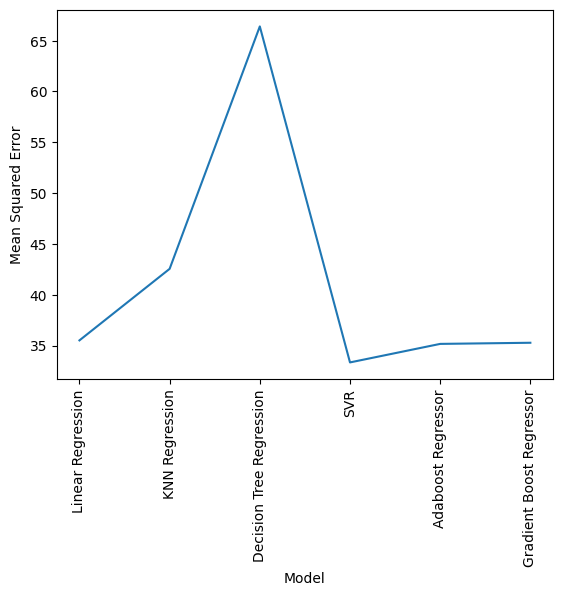

In [39]:
sns.lineplot(x=regression_scores_df['Model'], y=regression_scores_df['Mean Squared Error'], data=regression_scores_df)
plt.xticks(rotation=90)